In [548]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
#倒入一些必要的库

In [549]:
feanum=1#一共有多少特征
window=1#时间窗设置
df1=pd.read_csv('../Resource/FLUXNET2015/FLX_AR-Vir_FLUXNET2015_FULLSET_DD_2009-2012_1-3.csv') #读取数据
#df1=pd.read_csv('../Resource/FLUXNET2015/FLX_AU-TTE_FLUXNET2015_FULLSET_DD_2012-2014_1-3.csv') #读取数据 这个在测试集上表现较差
#df1=pd.read_csv('../Resource/FLUXNET2015/FLX_CA-TPD_FLUXNET2015_FULLSET_DD_2012-2014_1-3.csv') #读取数据
l=len(df1)
df1=df1.iloc[:,1:]#删除前1列没用的
df1.tail()

,SW_IN_Fx/Rax,SW_IN_Fx,Rax,Ra,SW_IN_F,TA_F,WS_F,TA_D,RH,dswrf,gust,spfh,tmax,tmin
762,0.169081,140.628,831.72,829.89,144.192,4.665,1.907,1.637,66.106378,675,15.986750,1.114,2.15,0.15
763,0.173748,144.192,829.89,828.18,142.989,6.302,2.359,4.302,61.232194,672,20.620190,1.402,1.75,0.75
764,0.172654,142.989,828.18,826.60,142.198,10.604,2.081,4.902,53.436383,658,18.576380,1.611,3.45,2.55
765,0.172028,142.198,826.60,825.15,29.575,15.506,1.611,3.271,69.940019,43,13.566643,3.608,11.45,8.65
766,0.035842,29.575,825.15,823.82,68.185,18.777,1.151,3.033,70.643164,336,6.479128,3.905,14.45,13.95


In [550]:
print(len(df1.iloc[0]))

14


In [551]:
#print(df1.iloc[:,-1])
#print(df1.iloc[1:10,1])

In [552]:
from sklearn import preprocessing#进行归一化操作
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)

dfs = df.to_numpy()
#print("dfs:",dfs[300:330])



# 这里y_train = train[:, -1][:,1] , 其中把每一层数据中的第第二例数据（[:,1]）作为y进行训练，也就是可以进行对第二列数据进行预测

In [553]:
#这一部分在处理数据 将原始数据改造为模型需要的输入
stock=df
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.to_numpy() #pd.DataFrame(stock) 表格转化为矩阵
print("data_len:",len(data))
sequence_length = seq_len + 1#序列长度+1 加1作为标签？
result = []
for index in range(len(data) - sequence_length):#循环 数据长度-时间窗长度 次 17520-5
    #print("index",index) index = 0...range(len(data)-sequence_length)
    result.append(data[index: index + sequence_length])#第i行到i+5 ,[0:6],[1:7],[2:8] -> data={[0:5],[1:6],[2:7]...[17514:17514+5]} ->分为序列数据(5行作为一个序列=4个小时为基础单位-作为训练)
result = np.array(result)#得到样本，样本形式为 window*feanum
#print(result) #每行是基础数据的前六行数据,
#print("2",result[1:3]) #每行是基础数据的前六行数据,
#test21 = []
#test21 =  result[1:6]
#print("rest[1:3]:",test21)
# print("test21[:,-1]:",test21[:,-1])#取所有层的每层中的最后一行数据
#print("test21[:,-1][:,-1]:",test21[:,-1][:,1])#取所有层的每层中的最后一行数据中的最后一列数据
# print("test21[:,:-1]:",test21[:,:-1])#除了每层中的最后一行都取

# test31 = result[1:3][:,-1] # 这句代码的意思是：取三维数组的第一块数据到第四块数据(在三维中可以理解成前两层),[:4]为:取前两层的数据中的每块（层）中的最后一行数据
# #如果等于[1:3][:-1] :取前两层中的每层中的最后一行数据
# print("test31",test31)
cut=150#分训练集测试集 最后cut个样本为测试集
train = result[:-cut, :] # 训练集为第零行到倒数第cut=150行,默认取所有列
x_train = train[:, :-1] #除了每层中的最后一行都取
y_train = train[:, -1][:,3] #取所有层的每层中的最后一行数据中的最后一列数据(当等于-1的时候)
x_test = result[-cut:, :-1]
y_test = result[-cut:, -1][:,1]
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
# print("X_train.shape[0]:",x_train.shape[0])
# print("X_train.shape[1]:",x_train.shape[1])
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
# print("X_test.shape[0]:",x_test.shape[0])
# print("X_test.shape[1]:",x_test.shape[1])

data_len: 767


# 曲线绘制测试

In [554]:
# import matplotlib.pyplot as plt
# import numpy as np
#
# x = np.linspace(0, 5, 50)
# y_train_show = y_train[100:400]
#
# # 将数据转换成pandas的Series类型，并进行滑动平均处理
# df = pd.Series(y_train_show).rolling(window=5).mean()
#
# # 绘制平滑后的曲线
# plt.figure(figsize=(12,6))
# plt.plot(df)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Test')
# plt.show()


In [555]:
#print("train_set:",x_train[17363]) #数据为     17364个块(窗口)  <- 5行数据为一个序列=时间窗口 <- 一行数据(八个特征)

In [556]:
#展示下训练集测试集的形状 看有没有问题
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (615, 1, 14)
y_train (615,)
X_test (150, 1, 14)
y_test (150,)


In [557]:
print("Length X_train:",len(X_train))
print("Length y_train:",len(y_train))
print("cut",cut)
print("X_test:",len(X_test))
print("y_test:",len(y_test))

Length X_train: 615
Length y_train: 615
cut 150
X_test: 150
y_test: 150


In [558]:
#更改数组shape
X_train=X_train.reshape(len(X_train),window*(len(df1.iloc[0]))) #17365 * 4 * 8 = 557120 = 17365*32
y_train=y_train.reshape(len(X_train)) # 17365
X_test=X_test.reshape(cut,window * (len(df1.iloc[0]))) # 150 * 4 * 8 = 150 * 32(window)
y_test=y_test.reshape(cut) # 150
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (615, 14)
y_train (615,)
X_test (150, 14)
y_test (150,)


In [559]:
print(y_train)

[9.93159151e-01 9.94005791e-01 9.94784700e-01 9.95529742e-01
 9.96207054e-01 9.96833568e-01 9.97392350e-01 9.97917266e-01
 9.98391385e-01 9.98797772e-01 9.99136428e-01 9.99288823e-01
 9.98967100e-01 9.99830672e-01 9.99949202e-01 1.00000000e+00
 9.99983067e-01 9.99949202e-01 9.99813739e-01 9.99610546e-01
 9.99339621e-01 9.99000965e-01 9.98594578e-01 9.98120460e-01
 9.97561678e-01 9.96952097e-01 9.96257853e-01 9.95495877e-01
 9.94649237e-01 9.93717934e-01 9.92718899e-01 9.91635200e-01
 9.90466837e-01 9.89230743e-01 9.87893052e-01 9.86470698e-01
 9.84963679e-01 9.83371997e-01 9.81678717e-01 9.79883841e-01
 9.78004301e-01 9.76023164e-01 9.73957363e-01 9.71773033e-01
 9.69504038e-01 9.67116515e-01 9.64627394e-01 9.62036676e-01
 9.59327429e-01 9.56499653e-01 9.53553347e-01 9.50505444e-01
 9.47339011e-01 9.44054049e-01 9.40650558e-01 9.37128537e-01
 9.33471053e-01 9.29695040e-01 9.25800498e-01 9.21770493e-01
 9.17605026e-01 9.13321029e-01 9.08901570e-01 9.04346648e-01
 8.99656264e-01 8.948304

In [560]:
# Fit regression model
from sklearn.svm import SVR  
svr = SVR(kernel='rbf', gamma=0.1) 
model = svr.fit(X_train, y_train)

In [561]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)

In [562]:
print(y_train_predict)

[0.91324803 0.91376411 0.91517639 0.91873514 0.92123171 0.91589215
 0.9177525  0.91284445 0.91274051 0.91939154 0.91911697 0.91081971
 0.91612436 0.91707587 0.92001134 0.91991745 0.91866233 0.91440643
 0.92291993 0.92242429 0.92231846 0.90777352 0.90427452 0.91398352
 0.92252168 0.92291047 0.91640031 0.91784382 0.91446949 0.91285074
 0.90866675 0.92109664 0.91488514 0.91212457 0.91528303 0.91095513
 0.90507901 0.91676091 0.91625078 0.90789977 0.91074503 0.90859319
 0.91133316 0.90755833 0.90337105 0.90638758 0.90475755 0.90305366
 0.8998175  0.89427035 0.88443383 0.87548558 0.8889745  0.88994517
 0.88634868 0.87297781 0.87444479 0.8835503  0.87636458 0.87363561
 0.87065721 0.86778533 0.86117038 0.8518181  0.85442164 0.85665625
 0.85371369 0.84963266 0.84694761 0.83754321 0.81543995 0.82003532
 0.80442627 0.82252864 0.81140657 0.79416969 0.81262974 0.80882296
 0.80359926 0.80435296 0.79158378 0.79226157 0.7827718  0.784466
 0.7732174  0.76764554 0.76480345 0.75373941 0.74906549 0.709935

Text(0.5, 1.0, 'Train Data  For Ra')

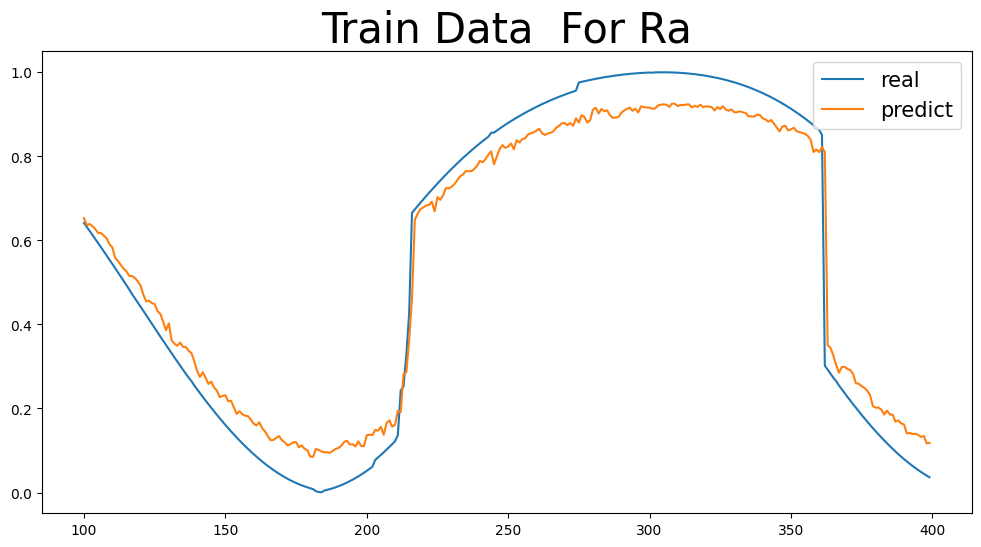

In [567]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:400,0].plot(figsize=(12,6))
draw.iloc[100:400,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data  For Ra",fontsize='30') #添加标题
#展示在训练集上的表现 

In [564]:
#在测试集上的预测
y_test_predict=model.predict(X_test)

Text(0.5, 1.0, 'Test Data For Ra')

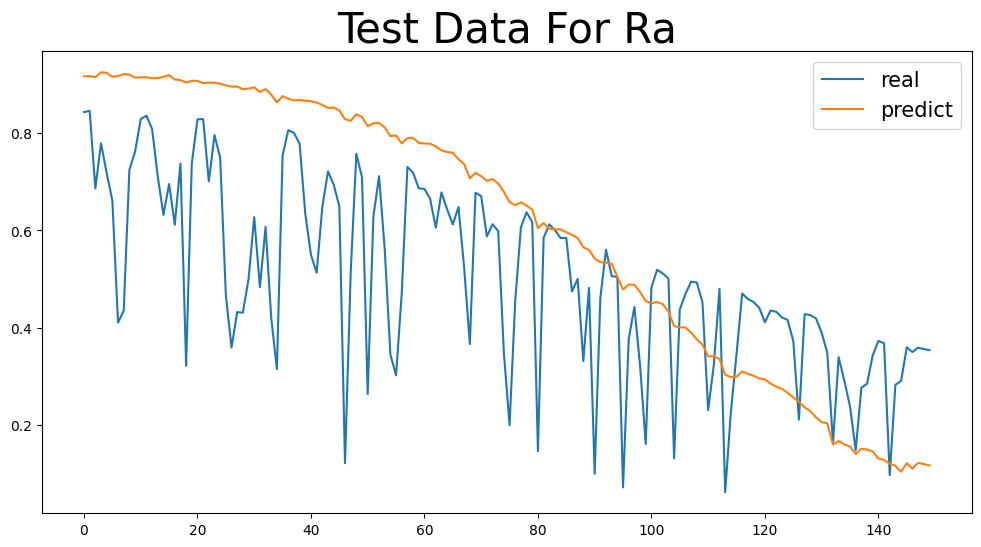

In [571]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
#print(draw.iloc[:])
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data For Ra",fontsize='30') #添加标题
#展示在测试集上的表现 

In [566]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict, y_test) )

训练集上的MAE/MSE/MAPE
0.06041581419138609
0.004642810848445373
20.773388115173518
测试集上的MAE/MSE/MAPE
0.1829779994928802
0.05379989085716433
41.88409887620659
